In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)

In [2]:
movie = pd.read_csv('IMDB_movie_reviews_details.csv', index_col = 0)
movie

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M
...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,A young New York socialite becomes interested ...,"169,575",NaN
996,Giant,1956,201,"Drama, Western",7.6,84.0,Sprawling epic covering the life of a Texas ca...,"34,759",NaN
997,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,"37,753",$20.00M
998,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,"In Hawaii in 1941, a private is cruelly punish...","44,086",$30.50M


In [3]:
movie.isnull().sum()

name           0
year           0
runtime        0
genre          0
rating         0
metascore    159
timeline       0
votes          0
gross        171
dtype: int64

In [4]:
movie = movie.dropna(axis = 0)
movie

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M
5,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,A jury holdout attempts to prevent a miscarria...,"706,079",$4.36M
...,...,...,...,...,...,...,...,...,...
991,Kelly's Heroes,1970,144,"Adventure, Comedy, War",7.6,50.0,A group of U.S. soldiers sneaks across enemy l...,"45,985",$1.38M
993,The Jungle Book,1967,78,"Animation, Adventure, Family",7.6,65.0,Bagheera the Panther and Baloo the Bear have a...,"168,985",$141.84M
994,A Hard Day's Night,1964,87,"Comedy, Musical",7.6,96.0,"Over two ""typical"" days in the life of The Bea...","40,931",$13.78M
997,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,"37,753",$20.00M


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       747 non-null    object 
 1   year       747 non-null    object 
 2   runtime    747 non-null    int64  
 3   genre      747 non-null    object 
 4   rating     747 non-null    float64
 5   metascore  747 non-null    float64
 6   timeline   747 non-null    object 
 7   votes      747 non-null    object 
 8   gross      747 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 58.4+ KB


In [6]:
movie.gross = movie.gross.apply(lambda x: x[1:-1])
movie.gross = pd.to_numeric(movie.gross)
movie.gross = movie.gross * 1000000
movie.gross

C:\Users\Hp\anaconda4\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       28340000.0
1      134970000.0
3      534860000.0
4       57300000.0
5        4360000.0
          ...     
991      1380000.0
993    141840000.0
994     13780000.0
997     20000000.0
998     30500000.0
Name: gross, Length: 747, dtype: float64

In [7]:
movie.votes = movie.votes.apply(lambda x: x.replace(",",""))
movie.votes = pd.to_numeric(movie.votes)
movie.votes

0      2394059
1      1658439
3      2355907
4      1152912
5       706079
        ...   
991      45985
993     168985
994      40931
997      37753
998      44086
Name: votes, Length: 747, dtype: int64

In [8]:
movie.year = movie.year.apply(lambda x: x[-4:])
movie.year = pd.to_numeric(movie.year)
movie.year

0      1994
1      1972
3      2008
4      1974
5      1957
       ... 
991    1970
993    1967
994    1964
997    1953
998    1953
Name: year, Length: 747, dtype: int64

In [9]:
movie.isnull().sum()

name         0
year         0
runtime      0
genre        0
rating       0
metascore    0
timeline     0
votes        0
gross        0
dtype: int64

1: movie with highest rating

In [10]:
movie.nlargest(1,['rating'])

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,2394059,28340000.0


2: Gragh showing lowest to highest movies in ascending order

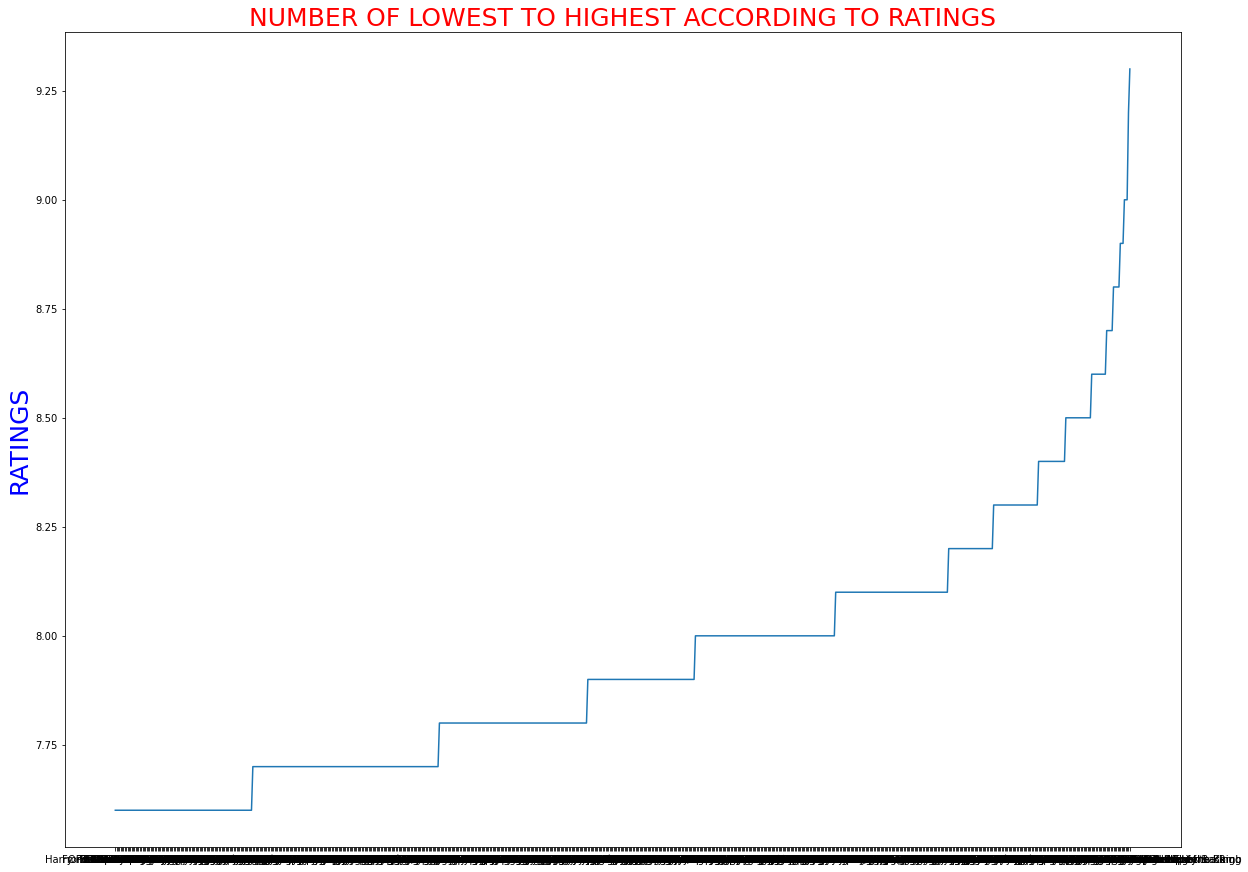

In [11]:
fig = plt.figure(figsize = (20,15))
ascending_order_rating = movie.sort_values(by ='rating')
plt.plot(ascending_order_rating.name, ascending_order_rating.rating)
plt.ylabel('RATINGS', color = 'b', fontsize = 25)
plt.title('NUMBER OF LOWEST TO HIGHEST ACCORDING TO RATINGS', color = 'r', fontsize = 25)
plt.show()

3:Total number of MOVIES from 2008 to 2019

In [12]:
movies_from_2008_to_2019 = len(movie[(movie.year >= 2008) & (movie.year <= 2019)])
print(f'The total number of movies released from 2008 to 2019 is {movies_from_2008_to_2019}')

The total number of movies released from 2008 to 2019 is 227


4: chart showing METASCORE per category

###### meta = movie.metascore.value_counts()
plt.figure(figsize = (20,20))
fig = px.bar(meta, y = meta, x = meta.index, text = meta.values, color = meta.index, labels = {'y': 'INDEX', 'index': 'METASCORE'},
             title = "NUMBER OF METASCORE BY CATEGORY", color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

5: percentage of games with 9+ ratings

In [14]:
percent_of_9plus = 100 *(len(movie[movie.rating >= 9.0])/len(movie))
percent_of_9plus

0.6693440428380187

6: percentage of movies released from 2010 to 2020

In [15]:
year_percent = {}
for year in range(2010,2020):
    percent = 100 * (len(movie[movie.year == year])/len(movie))
    year_percent[year] = round(percent, 2)
    
pd.DataFrame(list(year_percent.items()), columns = ['year','percentage'])

,year,percentage
0,2010,2.68
1,2011,2.14
2,2012,2.01
3,2013,3.21
4,2014,3.75
5,2015,2.41
6,2016,2.68
7,2017,2.54
8,2018,1.61
9,2019,2.01


7: Top 5 genre with highest rating

In [17]:
top_five = {}
for name,group in movie.groupby('genre'):
    movie1 = movie[movie.genre == name]
    top_five[name] = movie1.rating.max()
movie_rating = pd.DataFrame(top_five.items(), columns = ['genre','highest rating'])
movie_rating.sort_values(by = 'highest rating', ascending = False).head()

,genre,highest rating
117,Drama,9.3
104,"Crime, Drama",9.2
17,"Action, Crime, Drama",9.0
74,"Biography, Drama, History",8.9
2,"Action, Adventure, Drama",8.9


8: Graph to show movies with the same runtime

In [18]:
runtime = movie.runtime.unique()
run_time = {}
for time in runtime:
    movie_runtime = movie[movie.runtime == time]
    run_time[time]= len(movie_runtime)
    
time = pd.DataFrame(run_time.items(), columns=['runtime','number']).set_index('runtime')
time = time[time.number > 1]
time

,number
runtime,
142,4
152,6
202,2
96,8
154,5
...,...
85,3
157,5
97,6


In [19]:
runtime = movie['runtime'].value_counts()
fig = px.bar(runtime, y = runtime, x = runtime.index, text = runtime.values, color = runtime.index, 
             labels = {'y': 'NUMBER OF MOVIES', 'index': 'RUNTIME'}, title = 'MOVIES WITH THE SAME RUNTIME', 
             color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()
